In [1]:
from gensim import models
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
ko_model = models.fasttext.load_facebook_model('./cc.ko.300.bin')

AttributeError: module 'gensim.models.fasttext' has no attribute 'load_facebook_model'

In [100]:
mbti_list = ['ISTJ','ISFJ','INFJ','INTJ',
                        'ISTP','ISFP','INFP','INTP',
                        'ESTP','ESFP','ENFP','ENTP',
                        'ESTJ','ESFJ','ENFJ','ENTJ']

In [85]:
def kmeans_model(n,pca_df):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(pca_df)
    return kmeans

In [95]:
def pca_df(word,n):
    words = word
    n_num = n
    pca = PCA(n_components=n_num)
    pca_array = pca.fit_transform([ko_model.wv.word_vec(w) for w in words])
    pca_df = pd.DataFrame(pca_array,index=word,columns=[f"pca{num+1}" for num in range(n_num)])
    return pca_df

In [2]:
def top_n(count_dict, reverse, n=3):
    return dict(sorted(count_dict.items(), reverse=reverse, key=lambda x: x[1])[:n])

In [188]:
mbti_keyword =[]
for mt in mbti_list:
    mbti_keyword.extend(list(mbti[mt].dropna().keys()))
mbti_keyword = set(mbti_keyword)

In [209]:
df = pca_df(w,2)

/tmp/ipykernel_24133/3279697885.py:5: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  pca_array = pca.fit_transform([ko_model.wv.word_vec(w) for w in words])


In [210]:
df

,pca1,pca2
회사,-0.513741,0.077703
안목,0.145039,0.283911
발랄,0.197420,0.866385
내용,-0.325814,-0.498684
수정,0.107898,-0.547541
...,...,...
균형,0.054937,0.016617
지원,-0.166461,-0.538203
동시,0.002096,-0.244367
활동,-0.452724,-0.385031


In [211]:
model = kmeans_model(7,df)

/home/studio/anaconda3/envs/project/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f149e57eca0>
Traceback (most recent call last):
  File "/home/studio/anaconda3/envs/project/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/studio/anaconda3/envs/project/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/studio/anaconda3/envs/project/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/studio/anacond

In [212]:
df['labels'] = model.predict(df)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f143d2f6c10>
Traceback (most recent call last):
  File "/home/studio/anaconda3/envs/project/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/studio/anaconda3/envs/project/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/studio/anaconda3/envs/project/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/studio/anaconda3/envs/project/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


In [414]:
count = []
def test_knn():
    ww=[]
    for mt in mbti_list:
        m=set(mbti[mt].dropna().keys())
        min = 100000
        index=-1
        print(len(m))
        for i in range(30):
            test1 = set(list(df[df['labels']==i].index))
            if min>len(m-test1):
                min = len(m-test1)
                index = i
                ww=m&test1
        print(mt,min,ww)
        print(index)
        count.append(index)
    

In [415]:
count = []
df = pca_df(w,2)
model = kmeans_model(16,df)
df['labels'] = model.predict(df)
test_knn()
c = Counter(count)

/tmp/ipykernel_24133/3279697885.py:5: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  pca_array = pca.fit_transform([ko_model.wv.word_vec(w) for w in words])
/home/studio/anaconda3/envs/project/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f143d62b310>
Traceback (most recent call last):
  File "/home/studio/anaconda3/envs/project/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/studio/anaconda3/envs/project/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, inter

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f143d2f6c10>
Traceback (most recent call last):
  File "/home/studio/anaconda3/envs/project/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/studio/anaconda3/envs/project/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/studio/anaconda3/envs/project/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/studio/anaconda3/envs/project/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Threadpool

152
ISTJ 137 {'투자', '역할', '기여', '사고', '원칙', '의미', '요인', '상대', '능력', '임무', '규칙', '표현', '연락', '작용', '의견'}
3
152
ISFJ 139 {'힘들', '조언', '가치', '기회', '조화', '관심', '고민', '책임', '안정', '도움', '경험', '다양', '태도'}
12
142
INFJ 129 {'공개', '투자', '사고', '질문', '의미', '성장', '상대', '표현', '능력', '사명', '연락', '작용', '의견'}
3
169
INTJ 153 {'개인', '의식', '다중', '논리', '혁신', '회사', '미래', '본인', '여행', '비전', '외부', '지식', '관계', '특별', '직책', '자유'}
6
139
ISTP 124 {'합리', '물건', '여유', '습관', '자발', '감각', '능숙', '갈등', '현실', '권위', '객관', '행동', '대화', '신경', '표정'}
2
133
ISFP 119 {'힘들', '내면', '가치', '반대', '관심', '충돌', '비판', '고민', '위험', '감사', '도움', '경험', '다양', '태도'}
12
128
INFP 114 {'행복', '따뜻', '우울', '기분', '자책', '사랑', '감정', '직관', '상처', '공감', '다정', '마음', '애정', '상상'}
4
159
INTP 144 {'최선', '힘들', '가치', '기회', '반대', '관심', '약점', '비판', '뚜렷', '부정', '성공', '도움', '경험', '다양', '지적'}
12
149
ESTP 135 {'처리', '형성', '변화', '적응', '결정', '집중', '대처', '해결', '결론', '통제', '판단', '인식', '이해', '달성'}
9
126
ESFP 115 {'진지', '습관', '독특', '상호', '감각', '갈등', '주위', '현실', '행동', '대화', '낙천'}

In [416]:
c

Counter({3: 4, 12: 4, 6: 1, 2: 3, 4: 2, 9: 2})

In [417]:
max(c.values())

4

In [397]:
from IPython.display import clear_output
find = []
for n in range(3,40):
    count=[]
    df = pca_df(w,2)
    model = kmeans_model(n,df)
    df['labels'] = model.predict(df)
    test_knn()
    clear_output()
    c = Counter(count)
    if max(c.values())<5:
        print(n,c)
        find.append(n)

In [399]:
find

[11, 14, 16, 17, 33, 38]

In [364]:
from collections import Counter
c = Counter(count)
c

Counter({0: 19, 5: 8, 3: 1, 1: 3, 2: 1})

In [366]:
c[max(c)]>5

True

In [270]:
w = list(df[df['labels']==1].index)

In [271]:
w

['회사',
 '안목',
 '발랄',
 '내용',
 '수정',
 '완수',
 '절차',
 '민감',
 '발전',
 '해석',
 '행복',
 '발견',
 '영화',
 '오류',
 '우정',
 '가족',
 '교류',
 '이해',
 '표정',
 '따뜻',
 '주류',
 '주도',
 '의료',
 '매력',
 '선수',
 '모델',
 '격려',
 '기술',
 '감동',
 '습관',
 '반대',
 '거부',
 '임기',
 '용납',
 '낙천',
 '전략',
 '압박',
 '확실',
 '계획',
 '감성',
 '해결',
 '부정',
 '긍정',
 '관계',
 '마음',
 '요구',
 '격차',
 '모임',
 '관리',
 '만능',
 '자발',
 '평가',
 '정신',
 '대화',
 '조합',
 '기억',
 '정확',
 '극복',
 '기획',
 '기초',
 '자연',
 '호감',
 '존경',
 '관련',
 '능숙',
 '개념',
 '출세',
 '흥분',
 '진지',
 '낭비',
 '중심',
 '동기',
 '관찰',
 '교감',
 '세심',
 '예외',
 '결론',
 '도구',
 '간섭',
 '답답',
 '방법',
 '무시',
 '위주',
 '충동',
 '진솔',
 '고유',
 '예술',
 '눈물',
 '다르',
 '제공',
 '성찰',
 '목적',
 '환경',
 '상극',
 '적합',
 '풍부',
 '탐구',
 '상호',
 '소금',
 '공간',
 '독특',
 '성실',
 '인격',
 '도전',
 '요소',
 '약속',
 '상처',
 '창의',
 '천재',
 '논리',
 '친절',
 '느낌',
 '자유',
 '위기',
 '모범',
 '대담',
 '어렵',
 '인구',
 '예의',
 '태도',
 '수행',
 '행정',
 '수동',
 '내면',
 '운동',
 '성과',
 '패션',
 '의사',
 '신경',
 '지적',
 '주제',
 '면모',
 '상식',
 '저해',
 '발달',
 '갈등',
 '상상',
 '의리',
 '과학',
 '자존',
 '게임',
 '본인',
 '칭찬',

In [5]:
ko_model.wv.most_similar('한국')

[('일본', 0.6772720813751221),
 ('미국', 0.6106939315795898),
 ('중국', 0.6029750108718872),
 ('국내', 0.5997216701507568),
 ('-한국', 0.5573736429214478),
 ('남한', 0.545636773109436),
 ('韓國', 0.5384003520011902),
 ('북한', 0.5305578112602234),
 ('헬시', 0.5218292474746704),
 ('외국', 0.5176612138748169)]

In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

In [7]:
import json
with open(f'./movie_topic2.json', 'r') as f:
    movie = json.load(f)

In [8]:
mbti = pd.read_csv('./final_mbti_topic.csv',index_col=0)

In [155]:
l = list(mbti['ISFP'].dropna().index)

In [9]:
m_k = list(movie.keys())

In [10]:
keyword = []
for k in m_k:
    keyword.extend(list(movie[k].keys()))

In [11]:
kk = set(keyword)

In [159]:
l = list(movie['시그널_80987077'].keys())
# l.extend(list(mbti.index))

In [160]:
words = kk
pca = PCA(n_components=2)
xys = pca.fit_transform([ko_model.wv.word_vec(w) for w in words])
xs = xys[:,0]
ys = xys[:,1]
plt.figure(figsize=(14, 10))
plt.scatter(xs, ys, marker='o')
for i, v in enumerate(words):
    plt.annotate(v, xy=(xs[i], ys[i]))

/tmp/ipykernel_20955/4163718589.py:3: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  xys = pca.fit_transform([ko_model.wv.word_vec(w) for w in words])


/home/studio/anaconda3/envs/project/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


Error in callback <function flush_figures at 0x7fd3f8c4b4c0> (for post_execute):


KeyboardInterrupt: 

In [63]:
words = kk
n_num = 2
pca = PCA(n_components=n_num)
pca_array = pca.fit_transform([ko_model.wv.word_vec(w) for w in words])
pca_df = pd.DataFrame(pca_array,index=kk,columns=[f"pca{num+1}" for num in range(n_num)])

/tmp/ipykernel_24133/1383472360.py:4: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  pca_array = pca.fit_transform([ko_model.wv.word_vec(w) for w in words])


In [64]:
pca_df

,pca1,pca2
루시오,-0.474338,0.167014
회사,0.383265,-0.113542
탈레반,-0.363385,-0.024362
제독,0.756755,0.508803
히사이시조,-0.628520,-0.099812
...,...,...
북아일랜드,-0.551732,-0.054176
전방,0.522517,-0.400056
희선,0.021262,0.116617
리쉬,-0.173689,0.382886


In [ ]:
import numpy as np

In [ ]:
result = pd.DataFrame({'고윳값':pca.explained_variance_,'기여율':pca.explained_variance_ratio_},
                      index=[f"pca{num+1}" for num in range(n_num)])
result['누적기여율'] = result['기여율'].cumsum()
result

,고윳값,기여율,누적기여율
pca1,0.302245,0.071496,0.071496
pca2,0.110924,0.026239,0.097735


In [ ]:
result['고윳값'].sort_values(ascending=False)

pca1    0.302245
pca2    0.110924
Name: 고윳값, dtype: float64

In [ ]:
l = list(top_n(movie['시그널_80987077'],True,30).keys())

In [18]:
from sklearn.cluster import KMeans

In [65]:
x = []   # k 
y = []   # 응집도

for k in range(1, 30):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(pca_df)
    
    x.append(k)
    y.append(kmeans.inertia_)

/home/studio/anaconda3/envs/project/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f149ec15430>
Traceback (most recent call last):
  File "/home/studio/anaconda3/envs/project/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/studio/anaconda3/envs/project/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/studio/anaconda3/envs/project/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/studio/anacond

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f149ec15430>
Traceback (most recent call last):
  File "/home/studio/anaconda3/envs/project/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/studio/anaconda3/envs/project/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/studio/anaconda3/envs/project/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/studio/anaconda3/envs/project/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Threadpool

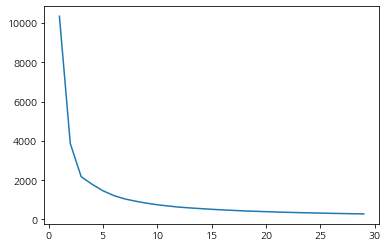

In [66]:
plt.plot(x, y)

In [195]:
len(movie)

1437

In [67]:
kmeans = KMeans(n_clusters=10)

In [68]:
kmeans.fit(pca_df)

/home/studio/anaconda3/envs/project/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f149defddc0>
Traceback (most recent call last):
  File "/home/studio/anaconda3/envs/project/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/studio/anaconda3/envs/project/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/studio/anaconda3/envs/project/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/studio/anacond

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f149defddc0>
Traceback (most recent call last):
  File "/home/studio/anaconda3/envs/project/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/studio/anaconda3/envs/project/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/studio/anaconda3/envs/project/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/studio/anaconda3/envs/project/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Threadpool

KMeans(n_clusters=10)

In [69]:
pca_df['labels'] = kmeans.predict(pca_df)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f14a4095c10>
Traceback (most recent call last):
  File "/home/studio/anaconda3/envs/project/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/studio/anaconda3/envs/project/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/studio/anaconda3/envs/project/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/studio/anaconda3/envs/project/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


In [70]:
pca_df.head()

,pca1,pca2,labels
루시오,-0.474338,0.167014,5
회사,0.383265,-0.113542,9
탈레반,-0.363385,-0.024362,1
제독,0.756755,0.508803,8
히사이시조,-0.628520,-0.099812,3


In [71]:
m = set(movie[list(movie.keys())[3]].keys())
min = 100000
for i in range(20):
    test1 = set(list(pca_df[pca_df['labels']==i].index))
    if min>len(m-test1):
        min = len(m-test1)
print(min)
print(i)


117
19


In [72]:
len(set(movie[list(movie.keys())[3]].keys()))

167

In [45]:
mbti_list = ['ISTJ','ISFJ','INFJ','INTJ',
                        'ISTP','ISFP','INFP','INTP',
                        'ESTP','ESFP','ENFP','ENTP',
                        'ESTJ','ESFJ','ENFJ','ENTJ']

In [79]:

for mt in mbti_list:
    m=set(mbti[mbti_list[0]].dropna().keys())
    min = 100000
    index=-1
    for i in range(10):
        test1 = set(list(pca_df[pca_df['labels']==i].index))
        if min>len(m-test1):
            min = len(m-test1)
            index = i
    print(mt,min)
    print(index)
    

ISTJ 67
7
ISFJ 67
7
INFJ 67
7
INTJ 67
7
ISTP 67
7
ISFP 67
7
INFP 67
7
INTP 67
7
ESTP 67
7
ESFP 67
7
ENFP 67
7
ENTP 67
7
ESTJ 67
7
ESFJ 67
7
ENFJ 67
7
ENTJ 67
7


In [62]:
pca_df[pca_df['labels']==19]

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca32,pca33,pca34,pca35,pca36,pca37,pca38,pca39,pca40,labels
기재,0.380846,-0.457114,-0.381621,0.527553,0.202018,0.151214,-0.748826,-0.367079,0.215607,-0.032117,...,-0.120374,0.052666,0.253330,0.339903,-0.344770,0.356129,0.133092,0.032073,0.119220,19
공략,0.619389,-0.435016,-0.460130,0.163134,-0.016647,0.312127,-0.261978,0.800281,0.135193,-0.131073,...,-0.052381,-0.074976,-0.809020,-0.161269,0.160761,-0.029515,-0.023199,-0.307151,0.120523,19
구별,0.302599,-0.553097,-0.095243,0.522615,0.119612,-0.143757,-0.247207,-0.099248,-0.179395,0.315574,...,-0.391227,-0.070774,0.132042,0.005246,-0.193390,0.124375,-0.205024,0.039574,-0.024446,19
예시,0.242558,-0.260831,-0.373925,0.291502,-0.020302,0.166085,-0.284559,-0.001643,-0.130113,-0.150817,...,-0.306847,-0.111518,0.112845,0.086279,0.034473,0.141360,0.050220,-0.043569,-0.063846,19
변경,0.216976,-0.369706,-0.508294,0.300417,0.103301,0.128812,-0.584964,-0.017010,0.224293,-0.049485,...,-0.189132,-0.147944,0.360007,-0.008762,-0.028413,0.176904,0.202408,0.161425,0.078766,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
제의,0.364615,-0.512725,-0.346616,0.223339,0.037766,-0.163606,-0.302597,0.097229,-0.000989,-0.049479,...,-0.029357,-0.138568,0.073707,0.121799,0.056314,-0.289992,-0.207502,0.124713,0.032467,19
제시,0.177560,0.117638,-0.331475,0.824719,0.215250,0.284773,-0.628083,-0.094528,-0.036537,-0.232391,...,-0.226915,-0.252928,0.003364,0.035179,-0.126875,0.228927,-0.069519,-0.183455,-0.086176,19
교체,0.446766,-0.376765,-0.486956,0.385780,0.106042,0.212348,-0.310450,-0.258968,0.318867,-0.208795,...,0.141057,0.039008,0.041687,-0.331215,0.095880,0.057344,0.227390,0.172743,-0.358127,19
종결,0.436133,-0.518391,-0.329822,0.625265,-0.008970,0.116794,-0.124777,0.478673,0.374047,-0.253859,...,-0.040214,-0.293718,-0.084871,-0.058412,0.241259,-0.047570,-0.042727,0.078041,0.064576,19


In [218]:
min

168

In [212]:
len(set(movie[list(movie.keys())[0]].keys()))

171

In [208]:
list(movie.keys())[0]

'시그널_80987077'

In [168]:
m_k = list(mbti.index)

In [171]:
words = m_k
n_num = 2
pca = PCA(n_components=n_num)
pca_array = pca.fit_transform([ko_model.wv.word_vec(w) for w in words])
pca_df = pd.DataFrame(pca_array,index=m_k,columns=[f"pca{num+1}" for num in range(n_num)])

/tmp/ipykernel_20955/3464056539.py:4: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  pca_array = pca.fit_transform([ko_model.wv.word_vec(w) for w in words])


In [173]:
pca_df['labels'] = kmeans.predict(pca_df)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fd3f31bbdc0>
Traceback (most recent call last):
  File "/home/studio/anaconda3/envs/project/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/studio/anaconda3/envs/project/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/studio/anaconda3/envs/project/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/studio/anaconda3/envs/project/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


In [192]:
test1 = set(list(pca_df[pca_df['labels']==3].index))
test2=set(list(mbti['INTJ'].dropna().index))

In [194]:
test2-test1

{'감각',
 '감성',
 '감정',
 '개념',
 '개인',
 '건축가',
 '경영',
 '고집',
 '공감',
 '과정',
 '과학자',
 '관리자',
 '교육',
 '기대',
 '기술',
 '낭비',
 '내향',
 '노력',
 '논리',
 '다중',
 '단순',
 '달성',
 '데이트',
 '동료',
 '로맨틱',
 '마인드',
 '만족',
 '목적',
 '발전',
 '변호사',
 '본인',
 '분석가',
 '비전',
 '사교',
 '상세',
 '서로',
 '세계',
 '세부',
 '솔직',
 '수학',
 '순간',
 '스트레스',
 '시스템',
 '시험',
 '심리',
 '아이디어',
 '약점',
 '에너지',
 '여행',
 '연인',
 '열정',
 '영향력',
 '완벽',
 '완벽주의',
 '외부',
 '외향',
 '용의주도',
 '유의미',
 '의식',
 '이론',
 '인구',
 '인문',
 '인식',
 '일반',
 '자연',
 '전략',
 '전략가',
 '전문',
 '전체',
 '절차',
 '정보',
 '정확',
 '조용',
 '조직',
 '존중',
 '지식',
 '지표',
 '직관',
 '직책',
 '창의',
 '체계',
 '친구',
 '컨설턴트',
 '타협',
 '통찰력',
 '특별',
 '파악',
 '풍부',
 '학습',
 '혁신',
 '호감',
 '호기심',
 '혼자',
 '활동',
 '회사',
 '흥미'}

In [185]:
len(test2)

169

<AxesSubplot:xlabel='pca1', ylabel='pca2'>

/home/studio/anaconda3/envs/project/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/studio/anaconda3/envs/project/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


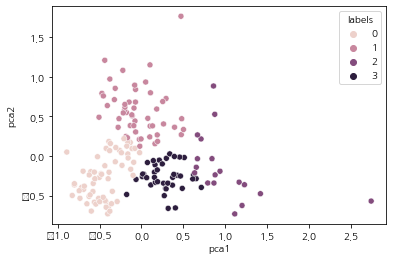

In [280]:
import seaborn as sns
sns.scatterplot(x='pca1', y='pca2', hue='labels', data=pca_df2)

In [272]:
pca_df[pca_df['labels']==3]

,pca1,pca2,labels
감각,0.180092,-0.569744,3
능력,0.145658,-0.082544,3
경험,0.402557,-0.146686,3
사랑,0.550107,-0.644237,3
마음,0.011426,-0.598165,3
행동,-0.023970,-0.197303,3
관심,0.386805,0.061614,3
공감,0.555592,-0.510910,3
대화,0.101661,-0.074934,3
상처,0.079161,-0.252750,3


In [273]:
l = list(movie['시그널_80987077'].keys())
# l.extend(list(mbti.index))

In [274]:
words = l
n_num = 2
pca = PCA(n_components=n_num)
pca_array = pca.fit_transform([ko_model.wv.word_vec(w) for w in words])
pca_df2 = pd.DataFrame(pca_array,index=l,columns=[f"pca{num+1}" for num in range(n_num)])

/tmp/ipykernel_76735/2095309247.py:4: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  pca_array = pca.fit_transform([ko_model.wv.word_vec(w) for w in words])


In [275]:
pca_df2['labels'] = kmeans.predict(pca_df2)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f127ab58a60>
Traceback (most recent call last):
  File "/home/studio/anaconda3/envs/project/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/studio/anaconda3/envs/project/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/studio/anaconda3/envs/project/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/studio/anaconda3/envs/project/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


In [281]:
pca_df2[(pca_df2['pca1']<0)&(pca_df2['pca2']<0)].head(50)

,pca1,pca2,labels
김은희,-0.403601,-0.727867,0
부분,-0.232406,-0.116355,0
김원석,-0.395150,-0.633769,0
캐스팅,-0.425826,-0.574329,0
짜임,-0.092480,-0.077669,0
개연,-0.398215,-0.284947,0
이재한,-0.433603,-0.560733,0
박해영,-0.512260,-0.531588,0
영화관,-0.562966,-0.580587,0
진웅,-0.176730,-0.483325,3


In [259]:
pca_df2[pca_df2['labels']==0].head(50)

,pca1,pca2,labels
부분,-0.232406,-0.116355,0
아쉬움,-0.892265,0.051368,0
평가,-0.069517,0.304793,0
짜임,-0.092480,-0.077669,0
대박,-0.025199,0.211256,0
사랑,0.103260,0.378880,0
집중,-0.186028,0.247816,0
세상,0.071410,-0.080747,0
정의,-0.021884,0.043512,0
간절,-0.260831,0.072788,0


In [260]:
pca_df2[pca_df2['labels']==0].head(50)

,pca1,pca2,labels
부분,-0.232406,-0.116355,0
아쉬움,-0.892265,0.051368,0
평가,-0.069517,0.304793,0
짜임,-0.092480,-0.077669,0
대박,-0.025199,0.211256,0
사랑,0.103260,0.378880,0
집중,-0.186028,0.247816,0
세상,0.071410,-0.080747,0
정의,-0.021884,0.043512,0
간절,-0.260831,0.072788,0


In [31]:
import re
from gensim.models import FastText
from konlpy.tag import Okt

In [1]:
import import_ipynb
import WordPreprocessing

importing Jupyter notebook from WordPreprocessing.ipynb


In [7]:
z=WordPreprocessing.sentence()


In [3]:
import pandas as pd
movie_raw = pd.read_csv('./total_review.csv')

In [50]:
s_list = []
for text in movie_raw['Watcha_Contents']:
    sentence=z.make_sentence(text)
    s_list.append(sentence)

In [53]:
token=[]
for s in s_list[0]:
    token.append(z.ext_text(s))

In [54]:
token = list(filter(None, token))
token

[['전개', '사건', '궁금증', '유발'],
 ['명연기', '영화', '긴박', '진부', '사랑', '골든', '타임', '장르'],
 ['이제훈', '뮤지컬'],
 ['연극'],
 ['거절', '편성', '다행'],
 ['전화'],
 ['미제', '사건'],
 ['유령', '시그널'],
 ['고질', '뒷심', '과도', '사랑', '주행', '김은희', '작가'],
 ['무한', '상사', '내년', '시그널'],
 ['내년', '조금', '물음', '조금', '긍정'],
 ['목격', '기분'],
 ['피해자', '힘없', '가해자', '피해', '죄송'],
 ['포기', '해결'],
 ['부작', '미드', '시즌', '방영', '티비'],
 ['시즌'],
 ['포기'],
 ['형사', '행복'],
 ['형사', '사랑', '사건', '해결'],
 ['경위', '행복'],
 ['가난', '가족', '지붕', '따뜻', '밥상', '외롭', '평범'],
 ['린다', '집중', '마약'],
 ['소름', '감동', '여운', '단어'],
 ['시즌', '기대'],
 ['훌륭', '작가', '의존'],
 ['해결', '반대말'],
 ['가슴'],
 ['미제', '사건', '가족', '사랑'],
 ['주제', '관통'],
 ['선전'],
 ['스릴러', '노련', '수사', '허술'],
 ['판타지'],
 ['긴박'],
 ['긴박'],
 ['긴박', '개연', '머리채'],
 ['한화', '한화', '방영'],
 ['이제훈', '김혜수', '감탄'],
 ['조진웅', '역할', '영화판', '존재감', '브라운관', '열연', '기쁘', '그지없'],
 ['후반', '과거', '회상', '넷플릭스', '정주', '몰입', '연속', '피로감', '평점', '주저', '짜임새', '탄탄'],
 ['전개', '스릴러', '오바'],
 ['짜릿', '아찔'],
 ['소름'],
 ['미드'],
 ['외국산', '습관'],
 ['사전',
  '제작',
  '

In [106]:
model = FastText(token,min_count=1,window=200,sg=3)

In [108]:
model.wv.most_similar('계획')

[('부상', 0.9283378720283508),
 ('세간', 0.9277594685554504),
 ('한탄', 0.9267628192901611),
 ('욕심쟁이', 0.9267123937606812),
 ('조절', 0.9266458749771118),
 ('빈틈없', 0.9262850284576416),
 ('옷깃', 0.9262002110481262),
 ('코멘트', 0.9257761240005493),
 ('사운드트랙', 0.9254829287528992),
 ('고지전', 0.9254226684570312)]